<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-датасете" data-toc-modified-id="Общая-информация-о-датасете-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о датасете</a></span></li><li><span><a href="#Обучающая,-валидационная-и-тестовая-выборки" data-toc-modified-id="Обучающая,-валидационная-и-тестовая-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучающая, валидационная и тестовая выборки</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Регрессия" data-toc-modified-id="Регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Регрессия</a></span></li></ul></li><li><span><a href="#Accuracy-на-тестовой-выборке" data-toc-modified-id="Accuracy-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Accuracy на тестовой выборке</a></span></li><li><span><a href="#Вменяемость-лучшей-из-обученных-моделей" data-toc-modified-id="Вменяемость-лучшей-из-обученных-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вменяемость лучшей из обученных моделей</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Рекомендация тарифов оператора мобильной связи

## Общая информация о датасете

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [3]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
data.columns

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')

**Вывод**

Датасет состоит из 1 таблицы, в которой 5 колонок. Их названия соответствуют общепринятым правилам стиля. Пропусков нет. Предобработка данных не требуется.

## Обучающая, валидационная и тестовая выборки

In [5]:
data_train, data_valid = train_test_split(data, test_size=0.20, random_state=12345)

In [6]:
data_train, data_test = train_test_split(data_train, test_size=0.25, random_state=12345)

In [7]:
len(data_train)

1928

In [8]:
len(data_test)

643

In [9]:
len(data_valid)

643

In [10]:
features_train = data_train.drop('is_ultra', axis=1)
target_train = data_train['is_ultra']

In [11]:
features_test = data_test.drop('is_ultra', axis=1)
target_test = data_test['is_ultra']

In [12]:
features_valid = data_valid.drop('is_ultra', axis=1)
target_valid = data_valid['is_ultra']

**Вывод**

Получили валидационную выборку как 20% датасета.

Далее из оставшихся 80% получили 25% для тестовой выборки - это 20% исходного датасета.

И 60% от исходного датасета попало в обучающую выборку.

Далее выделили признаки и целевой признак для каждой выборки.

## Обучение моделей

### Дерево решений

Глубина дерева = 1 accuracy: 0.7480559875583204
Глубина дерева = 2 accuracy: 0.7838258164852255
Глубина дерева = 3 accuracy: 0.7869362363919129
Глубина дерева = 4 accuracy: 0.7869362363919129
Глубина дерева = 5 accuracy: 0.7884914463452566
Глубина дерева = 6 accuracy: 0.7791601866251944
Глубина дерева = 7 accuracy: 0.7884914463452566
Глубина дерева = 8 accuracy: 0.7807153965785381
Глубина дерева = 9 accuracy: 0.7776049766718507
Глубина дерева = 10 accuracy: 0.7713841368584758

Accuracy наилучшей модели на валидационной выборке: 0.7884914463452566 Глубина дерева: 5


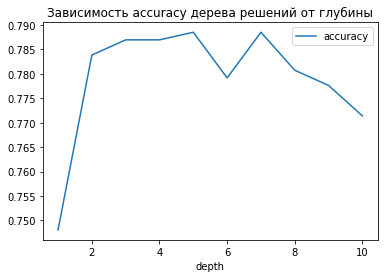

In [13]:
best_model = None
best_result = 0
best_depth = 0

accuracy_data = []

for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    print('Глубина дерева =', depth, 'accuracy:', result)

    accuracy_data.append([depth, result])  

    if result > best_result:
        best_depth = depth
        best_model = model
        best_result = result

pd.DataFrame(data = accuracy_data, columns = ['depth', 'accuracy']).plot(x='depth', y = 'accuracy', \
    title = 'Зависимость accuracy дерева решений от глубины')    
    
print()
print('Accuracy наилучшей модели на валидационной выборке:', best_result, 'Глубина дерева:', best_depth)
best_model_tree = best_model

**Вывод**

Обучили модель "Решающее дерево" на тренировочной выборке, поэкспериментировав с разной глубиной дерева. 

В итоге accuracy наилучшей модели на валидационной выборке составляет 0.78849 - при глубине дерева 5.

### Случайный лес

Accuracy наилучшей модели на валидационной выборке: 0.80248833592535 Глубина дерева: 7 Количество деревьев: 3


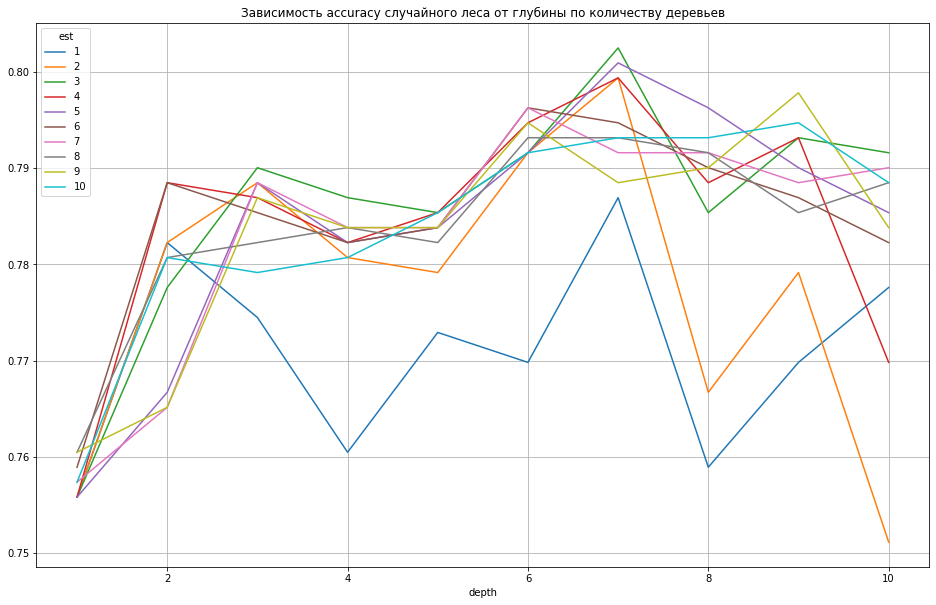

In [14]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0

accuracy_data = [] 

for est in range(1, 11):    
    for depth in range(1,11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth = depth)
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)
        #print('Количество деревьев =', est, 'Глубина дерева', depth, 'accuracy:', result)
    
        accuracy_data.append([est, depth, result])  

        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

pd.DataFrame(data = accuracy_data, columns = ['est', 'depth', 'accuracy']) \
  .pivot_table(index = 'depth', columns = 'est', values = 'accuracy', aggfunc = 'sum') \
  .plot(title = 'Зависимость accuracy случайного леса от глубины по количеству деревьев', grid = True, figsize=(16, 10))
        
#print()
print('Accuracy наилучшей модели на валидационной выборке:', best_result, 'Глубина дерева:', best_depth, 'Количество деревьев:', best_est)    
best_model_forest = best_model  

**Вывод**

Обучили модель "Случайный лес" на тренировочной выборке, поэкспериментировав с разным количеством деревьев и глубиной дерева. 

В итоге accuracy наилучшей модели на валидационной выборке составляет 0.80249 - при количестве деревьев 3 и глубине - 7.

### Регрессия

In [15]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid)
print('Accuracy модели логистической регрессии на валидационной выборке:', result)

Accuracy модели логистической регрессии на валидационной выборке: 0.7589424572317263


**Вывод**

Обучили модель "Логистическая регрессия" на тренировочной выборке. 

В итоге accuracy наилучшей модели на валидационной выборке составляет 0.75894.

## Accuracy на тестовой выборке

In [16]:
best_model_forest.score(features_test, target_test)

0.776049766718507

**Вывод**

Лучшая модель - "Случайный лес" с количеством деревьев 3 и глубине дерева - 7. Ее accuracy на валидационной выборке составляет 0.80249, а на тестовой - 0.77605.

## Вменяемость лучшей из обученных моделей

In [17]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=12345)
dummy_clf.fit(features_train, target_train)
dummy_clf.score(features_test, target_test)

0.6889580093312597

**Вывод**

Чтобы оценить адекватность модели в задачах классификации, нужно сравнить её со случайной. 

В нашей классификации 2 варианта - accuracy случайной модели 0.5. Таким образом, accuracy лучшей модели на тестовой выборке больше на 0.27605, чем у случайной.

Дополнительно оценили accuracy на тестовой выборке, для случая, когда все ответы равны 0 (константная модель). Результат получился 0.68896, что также ниже accuracy полученной модели.

## Общий вывод

В текущем проекте решали задачу классификации.

Лучшая модель - "Случайный лес" с количеством деревьев 3 и глубине дерева - 7. Ее accuracy на тестовой выборке составляет 0.77605, т.е.вероятность правильного ответа составляет 77,6%.